<a href="https://colab.research.google.com/github/samula98/cap_trees/blob/main/1_census_zip_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle

import geopandas
import plotly.express as px
import json
import requests
import geopy.distance

import graphviz
from IPython.display import display
from sklearn import tree

import os
import requests

import zipfile
from io import BytesIO
from io import StringIO

In [ ]:
shape_files = pd.read_html('https://www2.census.gov/geo/tiger/TIGER2024/AREAWATER/')

In [ ]:
len(shape_files)

1

In [ ]:
zip_df = shape_files[0][['Name']].dropna()

In [ ]:
filter = zip_df['Name'].str.contains('zip')
zip_df['url'] = 'https://www2.census.gov/geo/tiger/TIGER2024/AREAWATER/' + zip_df[filter]['Name']

In [ ]:
zip_df

,Name,url
1,Parent Directory,NaN
2,tl_2024_01001_areawater.zip,https://www2.census.gov/geo/tiger/TIGER2024/AR...
3,tl_2024_01003_areawater.zip,https://www2.census.gov/geo/tiger/TIGER2024/AR...
4,tl_2024_01005_areawater.zip,https://www2.census.gov/geo/tiger/TIGER2024/AR...
5,tl_2024_01007_areawater.zip,https://www2.census.gov/geo/tiger/TIGER2024/AR...
...,...,...
3232,tl_2024_72151_areawater.zip,https://www2.census.gov/geo/tiger/TIGER2024/AR...
3233,tl_2024_72153_areawater.zip,https://www2.census.gov/geo/tiger/TIGER2024/AR...
3234,tl_2024_78010_areawater.zip,https://www2.census.gov/geo/tiger/TIGER2024/AR...
3235,tl_2024_78020_areawater.zip,https://www2.census.gov/geo/tiger/TIGER2024/AR...


In [ ]:
type(zip_df)

pandas.core.frame.DataFrame

In [ ]:
zip_1 = zip_df['url'][2]

In [ ]:
zip_1

'https://www2.census.gov/geo/tiger/TIGER2024/AREAWATER/tl_2024_01001_areawater.zip'

In [ ]:
!curl -O {zip_1}

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  394k    0  394k    0     0  1421k      0 --:--:-- --:--:-- --:--:-- 1425k


In [ ]:
ls -la

total 41228
drwxr-xr-x 2 root root   20480 Dec  3 20:45 ./
drwxr-xr-x 3 root root   20480 Dec  3 19:34 ../
-rwxrwx--- 1 root root       5 Sep 14 03:51 tl_2024_01001_areawater.cpg*
-rwxrwx--- 1 root root  114173 Sep 14 03:51 tl_2024_01001_areawater.dbf*
-rwxrwx--- 1 root root     165 Sep 14 03:51 tl_2024_01001_areawater.prj*
-rwxrwx--- 1 root root  609540 Sep 14 03:51 tl_2024_01001_areawater.shp*
-rwxrwx--- 1 root root   22126 Sep 20 23:24 tl_2024_01001_areawater.shp.ea.iso.xml*
-rwxrwx--- 1 root root   41706 Sep 20 23:24 tl_2024_01001_areawater.shp.iso.xml*
-rwxrwx--- 1 root root    4972 Sep 14 03:51 tl_2024_01001_areawater.shx*
-rw-r--r-- 1 root root  404306 Dec  3 22:27 tl_2024_01001_areawater.zip
-rwxrwx--- 1 root root       5 Sep 14 03:51 tl_2024_01003_areawater.cpg*
-rwxrwx--- 1 root root  424219 Sep 14 03:51 tl_2024_01003_areawater.dbf*
-rwxrwx--- 1 root root     165 Sep 14 03:51 tl_2024_01003_areawater.prj*
-rwxrwx--- 1 root root 2781604 Sep 14 03:51 tl_2024_01003_areawater.shp*

In [ ]:
!unzip -l tl_2024_01001_areawater.zip

Archive:  tl_2024_01001_areawater.zip
  Length      Date    Time    Name
---------  ---------- -----   ----
        5  2024-09-14 03:51   tl_2024_01001_areawater.cpg
   114173  2024-09-14 03:51   tl_2024_01001_areawater.dbf
      165  2024-09-14 03:51   tl_2024_01001_areawater.prj
   609540  2024-09-14 03:51   tl_2024_01001_areawater.shp
    22126  2024-09-20 23:24   tl_2024_01001_areawater.shp.ea.iso.xml
    41706  2024-09-20 23:24   tl_2024_01001_areawater.shp.iso.xml
     4972  2024-09-14 03:51   tl_2024_01001_areawater.shx
---------                     -------
   792687                     7 files


In [ ]:
pwd

'/content/census/census'

In [ ]:
! mkdir census

In [ ]:
ls -la

total 41232
drwxr-xr-x 3 root root   20480 Dec  3 22:27 ./
drwxr-xr-x 3 root root   20480 Dec  3 19:34 ../
drwxr-xr-x 2 root root    4096 Dec  3 22:27 census/
-rwxrwx--- 1 root root       5 Sep 14 03:51 tl_2024_01001_areawater.cpg*
-rwxrwx--- 1 root root  114173 Sep 14 03:51 tl_2024_01001_areawater.dbf*
-rwxrwx--- 1 root root     165 Sep 14 03:51 tl_2024_01001_areawater.prj*
-rwxrwx--- 1 root root  609540 Sep 14 03:51 tl_2024_01001_areawater.shp*
-rwxrwx--- 1 root root   22126 Sep 20 23:24 tl_2024_01001_areawater.shp.ea.iso.xml*
-rwxrwx--- 1 root root   41706 Sep 20 23:24 tl_2024_01001_areawater.shp.iso.xml*
-rwxrwx--- 1 root root    4972 Sep 14 03:51 tl_2024_01001_areawater.shx*
-rw-r--r-- 1 root root  404306 Dec  3 22:27 tl_2024_01001_areawater.zip
-rwxrwx--- 1 root root       5 Sep 14 03:51 tl_2024_01003_areawater.cpg*
-rwxrwx--- 1 root root  424219 Sep 14 03:51 tl_2024_01003_areawater.dbf*
-rwxrwx--- 1 root root     165 Sep 14 03:51 tl_2024_01003_areawater.prj*
-rwxrwx--- 1 root ro

In [ ]:
cd census

/content/census/census/census


In [ ]:
zip_files = zip_df['url'][1:20]

In [ ]:
for file, url in zip_df[['Name', 'url']][1:5].to_numpy():
  print(file, url)

tl_2024_01001_areawater.zip https://www2.census.gov/geo/tiger/TIGER2024/AREAWATER/tl_2024_01001_areawater.zip
tl_2024_01003_areawater.zip https://www2.census.gov/geo/tiger/TIGER2024/AREAWATER/tl_2024_01003_areawater.zip
tl_2024_01005_areawater.zip https://www2.census.gov/geo/tiger/TIGER2024/AREAWATER/tl_2024_01005_areawater.zip
tl_2024_01007_areawater.zip https://www2.census.gov/geo/tiger/TIGER2024/AREAWATER/tl_2024_01007_areawater.zip


In [ ]:
for file, url in zip_df[['Name', 'url']][1:42].to_numpy():
  print(file, url)
  !curl -s -O {url}
  !unzip {file}

tl_2024_01001_areawater.zip https://www2.census.gov/geo/tiger/TIGER2024/AREAWATER/tl_2024_01001_areawater.zip
Archive:  tl_2024_01001_areawater.zip
 extracting: tl_2024_01001_areawater.cpg  
  inflating: tl_2024_01001_areawater.dbf  
  inflating: tl_2024_01001_areawater.prj  
  inflating: tl_2024_01001_areawater.shp  
  inflating: tl_2024_01001_areawater.shp.ea.iso.xml  
  inflating: tl_2024_01001_areawater.shp.iso.xml  
  inflating: tl_2024_01001_areawater.shx  
tl_2024_01003_areawater.zip https://www2.census.gov/geo/tiger/TIGER2024/AREAWATER/tl_2024_01003_areawater.zip
Archive:  tl_2024_01003_areawater.zip
 extracting: tl_2024_01003_areawater.cpg  
  inflating: tl_2024_01003_areawater.dbf  
  inflating: tl_2024_01003_areawater.prj  
  inflating: tl_2024_01003_areawater.shp  
  inflating: tl_2024_01003_areawater.shp.ea.iso.xml  
  inflating: tl_2024_01003_areawater.shp.iso.xml  
  inflating: tl_2024_01003_areawater.shx  
tl_2024_01005_areawater.zip https://www2.census.gov/geo/tiger/TI

In [ ]:
ls -la

total 41224
drwxr-xr-x 2 root root   20480 Dec  3 22:28 ./
drwxr-xr-x 3 root root   20480 Dec  3 22:27 ../
-rwxrwx--- 1 root root       5 Sep 14 03:51 tl_2024_01001_areawater.cpg*
-rwxrwx--- 1 root root  114173 Sep 14 03:51 tl_2024_01001_areawater.dbf*
-rwxrwx--- 1 root root     165 Sep 14 03:51 tl_2024_01001_areawater.prj*
-rwxrwx--- 1 root root  609540 Sep 14 03:51 tl_2024_01001_areawater.shp*
-rwxrwx--- 1 root root   22126 Sep 20 23:24 tl_2024_01001_areawater.shp.ea.iso.xml*
-rwxrwx--- 1 root root   41706 Sep 20 23:24 tl_2024_01001_areawater.shp.iso.xml*
-rwxrwx--- 1 root root    4972 Sep 14 03:51 tl_2024_01001_areawater.shx*
-rw-r--r-- 1 root root  404306 Dec  3 22:27 tl_2024_01001_areawater.zip
-rwxrwx--- 1 root root       5 Sep 14 03:51 tl_2024_01003_areawater.cpg*
-rwxrwx--- 1 root root  424219 Sep 14 03:51 tl_2024_01003_areawater.dbf*
-rwxrwx--- 1 root root     165 Sep 14 03:51 tl_2024_01003_areawater.prj*
-rwxrwx--- 1 root root 2781604 Sep 14 03:51 tl_2024_01003_areawater.shp*

In [ ]:
!unzip tl_2024_01003_areawater.zip

Archive:  tl_2024_01003_areawater.zip
replace tl_2024_01003_areawater.cpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
 extracting: tl_2024_01003_areawater.cpg  
replace tl_2024_01003_areawater.dbf? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: tl_2024_01003_areawater.dbf  
replace tl_2024_01003_areawater.prj? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: tl_2024_01003_areawater.prj  
replace tl_2024_01003_areawater.shp? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: tl_2024_01003_areawater.shp  
replace tl_2024_01003_areawater.shp.ea.iso.xml? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: tl_2024_01003_areawater.shp.ea.iso.xml  
replace tl_2024_01003_areawater.shp.iso.xml? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: tl_2024_01003_areawater.shp.iso.xml  
replace tl_2024_01003_areawater.shx? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
ls -la

total 41224
drwxr-xr-x 2 root root   20480 Dec  3 22:29 ./
drwxr-xr-x 3 root root   20480 Dec  3 22:27 ../
-rwxrwx--- 1 root root       5 Sep 14 03:51 tl_2024_01001_areawater.cpg*
-rwxrwx--- 1 root root  114173 Sep 14 03:51 tl_2024_01001_areawater.dbf*
-rwxrwx--- 1 root root     165 Sep 14 03:51 tl_2024_01001_areawater.prj*
-rwxrwx--- 1 root root  609540 Sep 14 03:51 tl_2024_01001_areawater.shp*
-rwxrwx--- 1 root root   22126 Sep 20 23:24 tl_2024_01001_areawater.shp.ea.iso.xml*
-rwxrwx--- 1 root root   41706 Sep 20 23:24 tl_2024_01001_areawater.shp.iso.xml*
-rwxrwx--- 1 root root    4972 Sep 14 03:51 tl_2024_01001_areawater.shx*
-rw-r--r-- 1 root root  404306 Dec  3 22:27 tl_2024_01001_areawater.zip
-rwxrwx--- 1 root root       5 Sep 14 03:51 tl_2024_01003_areawater.cpg*
-rwxrwx--- 1 root root  424219 Sep 14 03:51 tl_2024_01003_areawater.dbf*
-rwxrwx--- 1 root root     165 Sep 14 03:51 tl_2024_01003_areawater.prj*
-rwxrwx--- 1 root root 2781604 Sep 14 03:51 tl_2024_01003_areawater.shp*

In [ ]:
gpd = geopandas.read_file('tl_2024_01081_areawater.shp')

In [ ]:
gpd

,ANSICODE,HYDROID,FULLNAME,MTFCC,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,None,110415263977,None,H2030,0,22410,+32.6124738,-85.4162411,"POLYGON ((-85.41693 32.61172, -85.41691 32.611..."
1,None,110415263855,None,H2030,0,8368,+32.5930005,-85.3693360,"POLYGON ((-85.37067 32.59287, -85.3706 32.5929..."
2,None,110415263816,None,H2030,0,7205,+32.5794897,-85.4586361,"POLYGON ((-85.45909 32.57958, -85.45905 32.579..."
3,None,110415263933,None,H2030,0,11877,+32.5720394,-85.5033353,"POLYGON ((-85.50424 32.57179, -85.50424 32.571..."
4,None,110415263523,None,H2030,0,4597,+32.6405736,-85.3905822,"POLYGON ((-85.39108 32.64053, -85.3905 32.6409..."
...,...,...,...,...,...,...,...,...,...
522,None,110415263750,None,H2030,0,5032,+32.5420348,-85.5692604,"POLYGON ((-85.56966 32.54232, -85.56955 32.542..."
523,None,1102390235330,Chattahoochee Riv,H2030,0,292385,+32.6219730,-85.0923175,"POLYGON ((-85.09543 32.62587, -85.09413 32.626..."
524,None,110415263991,None,H3010,0,4966,+32.5114200,-85.0012860,"POLYGON ((-85.00152 32.51106, -85.00138 32.511..."
525,None,110415263786,None,H2030,0,97903,+32.5551965,-85.0775074,"POLYGON ((-85.07837 32.5547, -85.0779 32.55534..."


<Axes: >

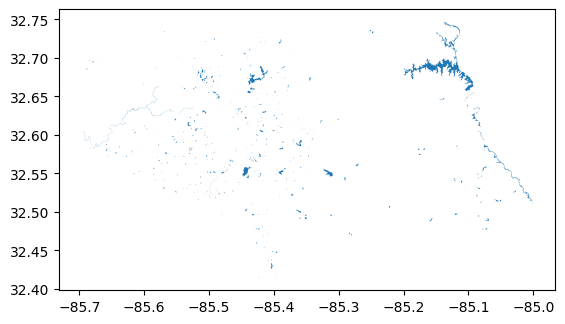

In [ ]:
gpd.plot()

In [ ]:
# !unzip *tl_2024*.zip

In [ ]:
# !unzip -l .zip